In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import load_model
import pickle
import tensorflow as tf
import cv2

In [ ]:
CARGANDO EL MODELO #Cambiar los paths donde sea necesario

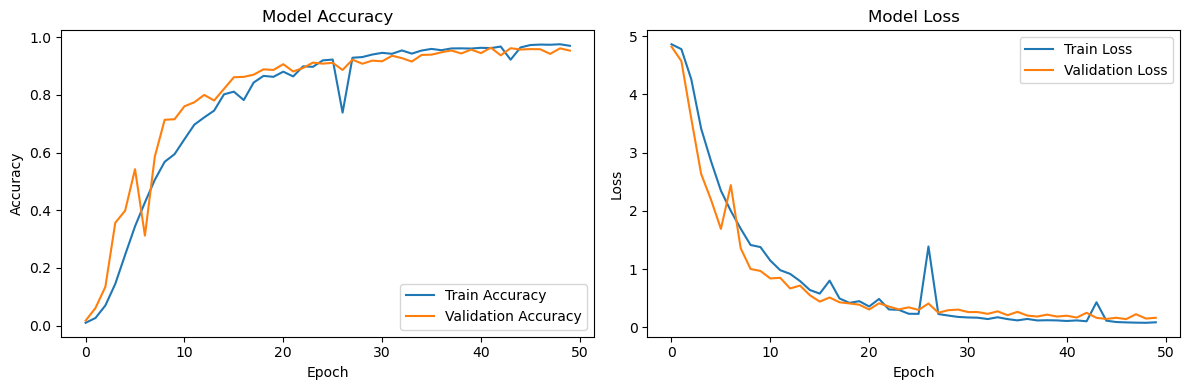

In [3]:
#El archivo pkl debe estar en la misma carpeta del notebook
#Se trae el archivo pickle donde se tiene la historia de entrenamiento para generar las gráficas. Nota se debe entrenar de nuevo modelo para que genere gráficas acordes
with open('training_history2.pkl', 'rb') as file:
    hist = pickle.load(file)


plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(hist['accuracy'], label='Train Accuracy')
plt.plot(hist['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(hist['loss'], label='Train Loss')
plt.plot(hist['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# Crear el conjunto de datos de prueba con preprocesamiento adecuado
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\migue\Desktop\Fruit-360\fruits-360_dataset\fruits-360\Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    image_size=(100, 100),
    batch_size=64,
    shuffle=True
)


# Imprimir nombre de las clases que identifica el modelo
class_names = test_set.class_names
print("Clases inferidas:", class_names)

# Normalizar las imágenes del conjunto de datos de prueba
normalization_layer = tf.keras.layers.Rescaling(1./255)
test_set = test_set.map(lambda x, y: (normalization_layer(x), y))

Found 22688 files belonging to 131 classes.
Clases inferidas: ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Ma

In [5]:
cnn = load_model(r'C:\Users\migue\SIC2024\SIC2024\P01\Proyecto Final\Modelo_entrenado_Frutas2.keras')

cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = cnn.evaluate(test_set)

355/355 ━━━━━━━━━━━━━━━━━━━━ 94s 256ms/step - accuracy: 0.9540 - loss: 0.1695


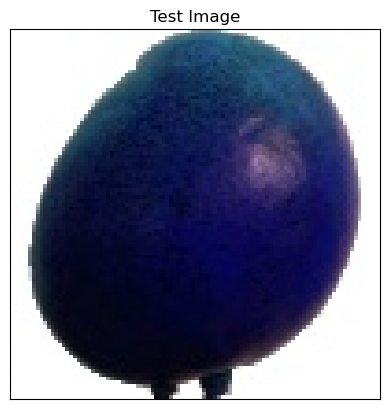

In [14]:
#Imagen con la que se quiere hacer la predicción
image_path=r'C:\Users\migue\Desktop\Fruit-360\fruits-360_dataset\fruits-360\Test\Mango Red\108_100.jpg'
img=cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [15]:
# Cargar y procesar la imagen
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(100, 100))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convertir la imagen a un array de NumPy y agregar una dimensión adicional

# Normalizar los valores de los píxeles entre 0 y 1
input_arr = input_arr / 255.0
predictions=cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [16]:
#Indica el porcentaje de semejanza de la imagen con cada una de las clases e imprimi la más cercana a 1 
print(predictions)
print(max(predictions[0]))

[[3.43677723e-13 1.20091068e-12 1.09637790e-23 4.36405051e-25
  2.00880747e-24 2.77078560e-18 5.25741627e-14 2.76191222e-17
  1.15934864e-17 1.23121860e-10 6.19493416e-23 7.21170408e-24
  3.09545306e-11 1.44054414e-18 3.67972059e-12 1.77736814e-27
  7.50346035e-21 5.95577071e-15 3.00762800e-12 2.07509283e-21
  1.18143980e-24 2.81738399e-18 7.31665796e-35 3.13726239e-30
  7.07408899e-21 1.55703163e-15 5.20025356e-09 5.40910075e-20
  1.02813965e-28 1.63160679e-10 6.38921194e-10 4.02721898e-22
  1.03916028e-13 1.77319482e-29 7.05181166e-20 2.57222787e-23
  2.37598880e-26 5.03566566e-09 2.16124759e-14 7.25577852e-22
  8.65717290e-11 3.84427999e-22 1.83222020e-21 1.66900662e-21
  8.10452044e-27 4.61882962e-12 7.93632084e-25 2.29720937e-27
  1.55872538e-15 7.45516431e-19 7.80808990e-34 1.72080109e-25
  2.05985770e-19 7.88276162e-26 4.44757121e-28 2.72189137e-27
  7.19293695e-17 3.25843659e-19 3.09135501e-32 1.19340755e-23
  1.26528667e-25 6.09253745e-25 1.01268305e-27 1.80695381e-22
  3.2657

In [17]:
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [18]:
#Indica la posición en el indice de la predicción realizada por el modelo
result_index= np.where(predictions[0]== max(predictions[0]))
print(result_index[0])

[65]


In [19]:
#Predicción del modelo
print("La fruta es: {}".format(class_names[result_index[0][0]]))

La fruta es: Mango Red


In [20]:
import json

# Función para cargar y leer el archivo de recetas
def cargar_recetas_desde_archivo(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        recetas_str = file.read()
        recetas = json.loads(recetas_str)
    return recetas

# Función para imprimir recetas según la fruta
def imprimir_recetas(fruta, recetas):
    encontradas = False
    for clave in recetas:
        # Convertir todo a minúsculas para hacer la búsqueda no sensible a mayúsculas
        if clave in fruta:
            encontradas = True
            print(f"Recetas de {clave}:")
            for receta in recetas[clave]:
                print(f"\n{receta['Nombre']}:")
                print("Ingredientes:")
                for ingrediente in receta['Ingredientes']:
                    print(f"- {ingrediente}")
                print("\nPasos:")
                for paso in receta['Pasos']:
                    print(f"- {paso}")
                print("")
    if not encontradas:
        print(f"No se encontraron recetas para {fruta}.")

# Ruta al archivo de recetas
archivo_recetas = 'Recetas.txt'

# Cargar las recetas desde el archivo
recetas = cargar_recetas_desde_archivo(archivo_recetas)

# Ejemplo de uso: imprimir recetas de una fruta específica
fruta_a_buscar = class_names[result_index[0][0]]
imprimir_recetas(fruta_a_buscar, recetas)



Recetas de Mango:

Smoothie de Mango:
Ingredientes:
- 2 mangos maduros
- 1 taza de leche
- 1/2 taza de yogur
- 1 cucharada de miel
- Hielo al gusto

Pasos:
- Pelar y cortar los mangos.
- Colocar todos los ingredientes en una licuadora.
- Licuar hasta obtener una mezcla suave y homogénea.
- Servir inmediatamente.


Ensalada de Mango y Aguacate:
Ingredientes:
- 2 mangos
- 2 aguacates
- 1 cebolla roja
- 1/4 taza de cilantro picado
- 2 cucharadas de jugo de limón
- Sal y pimienta al gusto

Pasos:
- Pelar y cortar los mangos y aguacates en cubos.
- Cortar la cebolla en rodajas finas.
- Mezclar el mango, el aguacate, la cebolla y el cilantro en un bol.
- Añadir el jugo de limón, la sal y la pimienta.
- Mezclar bien y servir.


Pollo con Salsa de Mango:
Ingredientes:
- 4 pechugas de pollo
- 2 mangos maduros
- 1/4 taza de salsa de soja
- 1 cucharada de miel
- 1 diente de ajo picado
- 1 cucharadita de jengibre rallado

Pasos:
- Pelar y cortar los mangos en cubos.
- Mezclar los mangos, la salsa 